In [82]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
DF=pd.read_csv('happiness_score_dataset.csv')
DF

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
A=DF.pop('Happiness Score')

In [7]:
DF.insert(11,'Happiness Score',A)

In [8]:
DF


,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [9]:
DF.head()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Switzerland,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Iceland,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Denmark,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Norway,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,Canada,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427


In [10]:
DF.tail()

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
153,Rwanda,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Benin,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Syria,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Burundi,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905
157,Togo,Sub-Saharan Africa,158,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2.839


In [11]:
DF.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [12]:
DF.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

# EDA

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

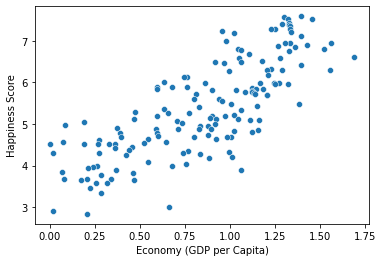

In [15]:
sea.scatterplot(x='Economy (GDP per Capita)',y='Happiness Score',data=DF)

Happines score increses with GDP

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

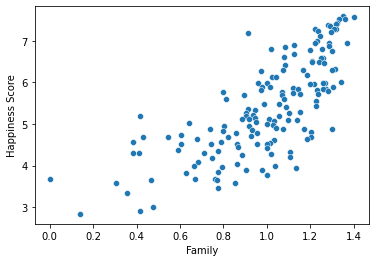

In [16]:
sea.scatterplot(x='Family',y='Happiness Score',data=DF)

This shows that the family contribute to the Happiness.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

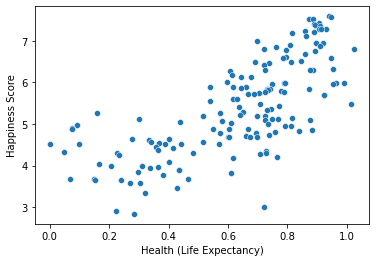

In [18]:
sea.scatterplot(x='Health (Life Expectancy)',y='Happiness Score',data=DF)

Healthy lifestyle increses happiness

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

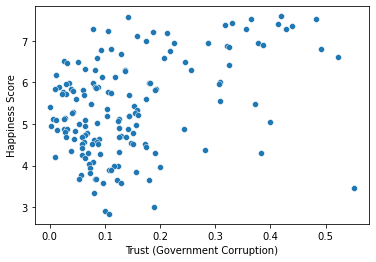

In [19]:
sea.scatterplot(x='Trust (Government Corruption)',y='Happiness Score',data=DF)

<AxesSubplot:xlabel='Generosity', ylabel='Happiness Score'>

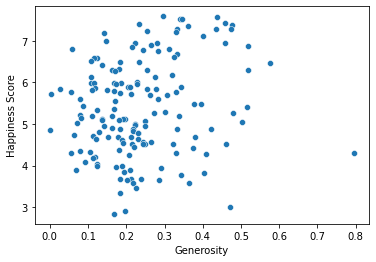

In [20]:
sea.scatterplot(x='Generosity',y='Happiness Score',data=DF)

<AxesSubplot:xlabel='Region', ylabel='Happiness Score'>

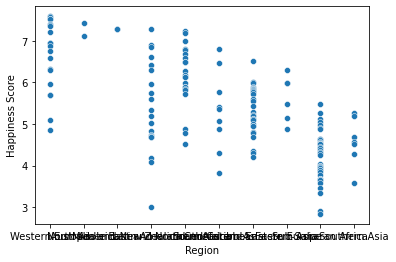

In [31]:
sea.scatterplot(x='Region',y='Happiness Score',data=DF)

In [21]:
DF.corr()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
Happiness Rank,1.000000,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999,-0.992105
Standard Error,0.158516,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981,-0.177254
Economy (GDP per Capita),-0.785267,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059,0.780966
Family,-0.733644,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117,0.740605
Health (Life Expectancy),-0.735613,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979,0.724200
Freedom,-0.556886,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783,0.568211
Trust (Government Corruption),-0.372315,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105,0.395199
Generosity,-0.160142,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301,0.180319
Dystopia Residual,-0.521999,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000,0.530474
Happiness Score,-0.992105,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474,1.000000


its a symmetric matrix or mirror matrix

<AxesSubplot:>

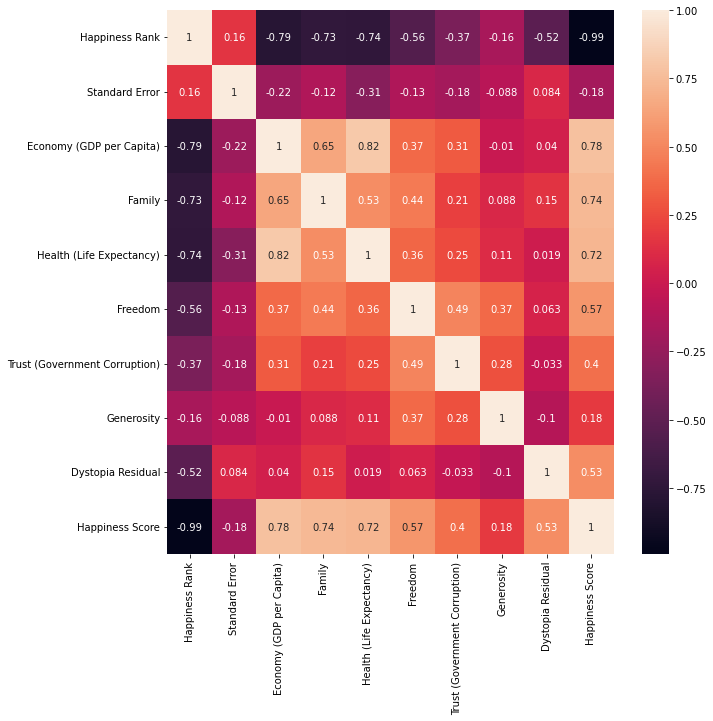

In [22]:
plt.figure(figsize=(10,10))
sea.heatmap(DF.corr(),annot=True)

In [24]:
DF.describe()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,5.375734
std,45.754363,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,1.145010
min,1.000000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,2.839000
25%,40.250000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,4.526000
50%,79.500000,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,5.232500
75%,118.750000,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,6.243750
max,158.000000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,7.587000


In [26]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# OUTLIERS

Happiness Rank                      AxesSubplot(0.125,0.657941;0.168478x0.222059)
Standard Error                   AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Family                           AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Health (Life Expectancy)            AxesSubplot(0.125,0.391471;0.168478x0.222059)
Freedom                          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Trust (Government Corruption)    AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Generosity                       AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Dystopia Residual                      AxesSubplot(0.125,0.125;0.168478x0.222059)
Happiness Score                     AxesSubplot(0.327174,0.125;0.168478x0.222059)
dtype: object

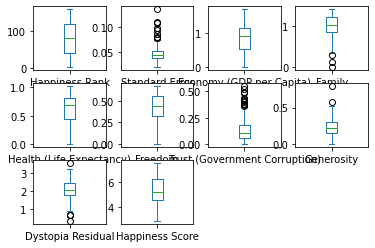

In [27]:
DF.plot(kind='box',subplots=True,layout=(3,4))

Outliers are present

In [32]:
DF.drop('Country',axis=1,inplace=True)

In [33]:
DF

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,Western Europe,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,Western Europe,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,Western Europe,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,Western Europe,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,North America,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,Sub-Saharan Africa,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,Middle East and Northern Africa,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,Sub-Saharan Africa,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


Label encoder


In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
DF['Region']=le.fit_transform(DF['Region'])

In [38]:
DF

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
153,8,154,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,3.465
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340
155,4,156,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,3.006
156,8,157,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2.905


In [39]:
z=np.abs(zscore(DF))
z.shape

(158, 11)

In [40]:
z

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,1.300256,1.721000,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,1.937360
1,1.300256,1.699075,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857,1.914581
2,1.300256,1.677149,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,1.884792
3,1.300256,1.655224,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,1.880411
4,0.040302,1.633299,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,1.797179
...,...,...,...,...,...,...,...,...,...,...,...
153,0.965117,1.633576,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925,1.674055
154,0.965117,1.655501,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967,1.783571
155,0.375441,1.677427,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430,2.076199
156,0.965117,1.699352,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985,2.164688


In [41]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))

In [42]:
DF_new=DF[(z<3).all(axis=1)]

In [43]:
DF_new

,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
150,8,151,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,8,152,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,7,153,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,8,155,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


In [44]:
print('Old Data Frame',DF.shape)
print('New Data Frame',DF_new.shape)
print('Total Dropped Rows',DF.shape[0]-DF_new.shape[0])

Old Data Frame (158, 11)
New Data Frame (149, 11)
Total Dropped Rows 9


<AxesSubplot:xlabel='Happiness Rank', ylabel='Density'>

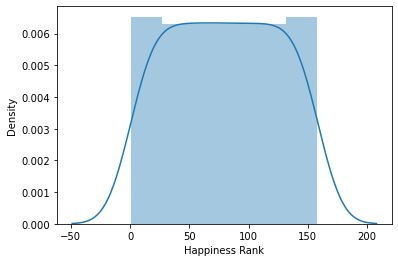

In [45]:
sea.distplot(DF['Happiness Rank'])

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

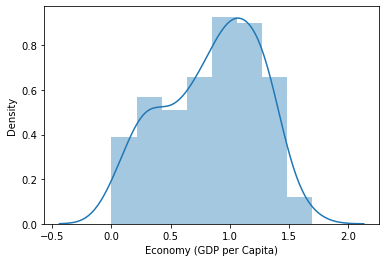

In [49]:
sea.distplot(DF['Economy (GDP per Capita)'])

<AxesSubplot:ylabel='Frequency'>

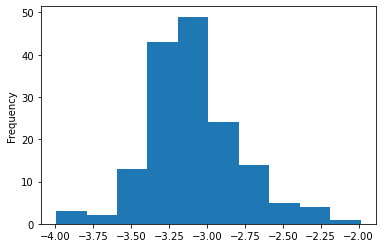

In [51]:
# log transform
DF['Standard Error']=np.log(DF['Standard Error'])
DF['Standard Error'].plot.hist() 

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

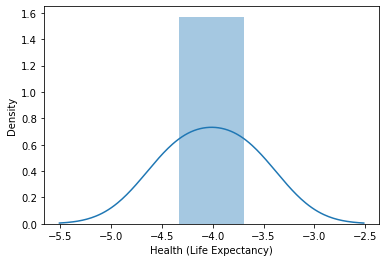

In [57]:
sea.distplot(DF['Health (Life Expectancy)'])

In [64]:
#inpedent Column
x=DF_new.iloc[:,:-1]

In [65]:
# target
y=DF_new.iloc[:,-1]

In [66]:
x.shape

(149, 10)

In [68]:
y.shape

(149,)

In [62]:
from sklearn.preprocessing import power_transform

In [69]:
x=power_transform(x,method='yeo-johnson')

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [73]:
ln.fit(x_train,y_train)

LinearRegression()

In [74]:
ln.score(x_train,y_train)

0.9956000440985351

We can  interpret that the model is working at 74% efficiency 

In [75]:
pred= ln.predict(x_test)
print('Predicted happiness score', pred)
print('Actual happiness score', y_test)

Predicted happiness score [5.28443881 6.97238333 4.46421258 5.14288669 5.19805267 6.46838496
 5.51373921 3.75602066 5.56908367 5.1085506  4.59259576 7.2428345
 6.37329673 7.38079997 6.89359906 5.8168835  3.85603693 5.47983864
 5.7644261  4.04759962 6.54995101 4.36907252 6.68404251 4.1925558
 4.20018131 3.71311402 4.54523039 4.72359516 5.94707622 6.50726317]
Actual happiness score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
Name: Happiness Score, dtype: float64


In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [77]:
print('mean_absolute_error :', mean_absolute_error(y_test,pred))
print('mean_squared_error :', mean_squared_error(y_test,pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred)))

mean_absolute_error : 0.04218601000980698
mean_squared_error : 0.0025476959266730096
Root Mean Squared Error : 0.05047470581066332


In [78]:
from sklearn.metrics import r2_score

In [80]:
print(r2_score(y_test,pred))

0.9977669681990389
